
# Recommender Systems — Foundational Models (Chapter 1)

This notebook presents foundational recommender system models built entirely from scratch, including exploratory data analysis, regression-based predictors, and simple non-personalized baselines.  
All implementations are performed without relying on external recommender libraries such as Surprise, emphasizing core algorithmic understanding.

---
## 📖 Table of Contents

### 1. [Exploratory Data Analysis (EDA) and Data Preprocessing](#eda)
- Importing Data and Initial Cleaning
- Data Summary and Validation
- Feature Correlation Analysis
- Data Splitting for Training and Testing

### 2. [Regression-Based Prediction Models](#regression)
- Simple Linear Regression
- Ridge Regression with Hyperparameter Tuning

### 3. [Popularity-Based Rating Prediction](#popularity)
- Average Rating Model
- Prediction and RMSE Evaluation

### 4. [Summary](#summary)

---


In [10]:
import os
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from platform import python_version

pd.options.display.max_columns = 200
pd.options.display.precision = 2

print('Version list\n')
print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(sns.__name__, sns.__version__)
print(matplotlib.__name__, matplotlib.__version__)

Version list

python 3.9.6
numpy 1.26.4
pandas 2.2.2
scipy 1.13.1
seaborn 0.13.2
matplotlib 3.9.2


## Part 1. Basic Data Processing, Analysis, and Visualization
## <a name='eda'></a> 📄 Exploratory Data Analysis (EDA) and Data Preprocessing

Performed initial data exploration and preprocessing to prepare the dataset for model development.

Key steps included:
- **Data Inspection**: Reviewed the structure and summary statistics of key variables such as "rating", "n_votes", "n_comments", and "rev_length".
- **Missing Value Handling**: Verified that there were no missing values requiring imputation.
- **Feature Correlation Analysis**: Computed and visualized the correlation matrix among numeric features to identify potential predictors.
- **Train-Test Split**: Randomly partitioned the dataset into an 80%-20% split, ensuring separation of training and evaluation phases.

This preparation ensured a clean and reliable dataset for building and validating subsequent recommendation models.

### a. Read data, create length column, and remove all unwanted data

In [13]:
df = pd.read_json('fantasy_10000.json', lines=True)
print(type(df))
df.head(5)

<class 'pandas.core.frame.DataFrame'>


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,5577844,52c8ac49496c153e4a97161e36b2db55,5,A beautiful story. Neil Gaiman is truly a uniq...,Wed Sep 24 09:29:29 -0700 2014,Wed Oct 01 00:31:56 -0700 2014,Tue Sep 30 00:00:00 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,5,1
2,8842281e1d1347389f2ab93d60773d4d,17315048,885c772fb033b041f42d57cef5be0a43,5,Mark Watney is a steely-eyed missile man. A ma...,Sat Apr 05 09:30:53 -0700 2014,Wed Mar 22 11:33:10 -0700 2017,Mon Aug 25 00:00:00 -0700 2014,Sat Aug 16 00:00:00 -0700 2014,25,5
3,8842281e1d1347389f2ab93d60773d4d,13453029,46a6e1a14e8afc82d221fec0a2bd3dd0,4,A fun fast paced book that sucks you in right ...,Tue Dec 04 11:12:22 -0800 2012,Sat Jul 26 11:43:28 -0700 2014,Tue Jul 08 00:00:00 -0700 2014,Wed Jul 02 00:00:00 -0700 2014,5,1
4,8842281e1d1347389f2ab93d60773d4d,13239822,a582bfa8efd69d453a5a21a678046b36,3,"This book has a great premise, and is full of ...",Mon Jul 02 16:04:16 -0700 2012,Wed Mar 22 11:32:20 -0700 2017,Wed Aug 15 00:00:00 -0700 2012,Sun Aug 12 00:00:00 -0700 2012,7,0


In [14]:
def getLen (row):
    '''This is the function that could get the length of "review_text"'''
    return len(row["review_text"])
# create the length column 
df['rev_length'] = df.apply(lambda x: getLen(x), axis = 1)

In [15]:
# drop all unwanted data
df = df.drop(columns=['review_text','date_added','date_updated','read_at','started_at'])
# show first 10 rows
df.head(10)

,user_id,book_id,review_id,rating,n_votes,n_comments,rev_length
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,28,1,2086
1,8842281e1d1347389f2ab93d60773d4d,5577844,52c8ac49496c153e4a97161e36b2db55,5,5,1,1521
2,8842281e1d1347389f2ab93d60773d4d,17315048,885c772fb033b041f42d57cef5be0a43,5,25,5,1519
3,8842281e1d1347389f2ab93d60773d4d,13453029,46a6e1a14e8afc82d221fec0a2bd3dd0,4,5,1,1791
4,8842281e1d1347389f2ab93d60773d4d,13239822,a582bfa8efd69d453a5a21a678046b36,3,7,0,1762
5,8842281e1d1347389f2ab93d60773d4d,62291,e23965adda7ce7e7e415a1339e169065,5,5,1,470
6,8842281e1d1347389f2ab93d60773d4d,41804,2bcbe2300fe1801197f9bfe1f1c883ba,5,12,2,823
7,8842281e1d1347389f2ab93d60773d4d,136251,132eab4c9a3724493204cc083e0e2ecc,5,6,3,532
8,8842281e1d1347389f2ab93d60773d4d,142296,400f536181a8ccf3a0f6b37d3fec14eb,4,6,2,616
9,8842281e1d1347389f2ab93d60773d4d,76620,9206654986a733bd753753aa0c882813,5,30,2,548


<font size = 4>*The data frame looks like above after edit.*
### b. display data frame information 

Use Pandas to display basic summary statistics (such as mean, min, max) for the numeric variables. Then, compute the total number of unique users and unique items (books) in the data. Also check if there are any null values in the data.

In [16]:
# show 5-number summary and count, mean as well as standard deviation 
df[['rating','n_votes','n_comments','rev_length']].describe()

,rating,n_votes,n_comments,rev_length
count,10000.00,10000.00,10000.00,10000.00
mean,3.74,1.59,0.28,791.69
std,1.25,11.35,1.50,1022.92
min,0.00,0.00,0.00,0.00
25%,3.00,0.00,0.00,157.00
50%,4.00,0.00,0.00,429.00
75%,5.00,1.00,0.00,983.00
max,5.00,355.00,45.00,14306.00


<font size = 4>*All summary of numeric varibles listed above. Although book_id is numeric from orginal data frame, it doesn't mean anything here.*

In [17]:
# print unique value 
print('There are {} unique users.'.format(len(df.user_id.unique())))
print('There are {} unique books.'.format(len(df.book_id.unique())))

There are 649 unique users.
There are 6465 unique books.


In [18]:
df.isnull().sum()

user_id       0
book_id       0
review_id     0
rating        0
n_votes       0
n_comments    0
rev_length    0
dtype: int64

<font size = 4>*There is no null value in the dataset.*

### c. display distributions

Visualize the distributions of variables "n_votes", "n_comments" and "rev_length". Compute and display the distribution of the counts of rating values.

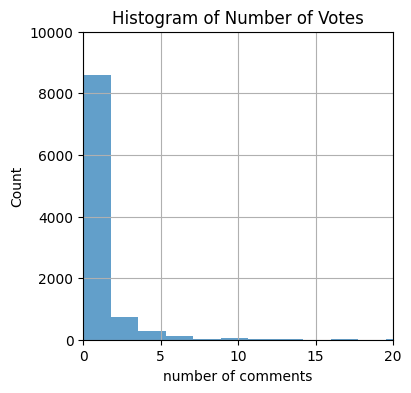

In [19]:
plt.figure(figsize=(4,4))
plt.hist(df['n_votes'], bins=200, alpha=0.7)
plt.xlabel('number of comments')
plt.ylabel('Count')
plt.title('Histogram of Number of Votes')
plt.axis([0,20, 0, 10000])
plt.grid(True)

In [20]:
df.n_votes.value_counts()

n_votes
0      7220
1      1390
2       499
3       226
4       179
       ... 
64        1
133       1
70        1
231       1
127       1
Name: count, Length: 92, dtype: int64

<font size = 4>*Since votes and comments are mostly 0 and 1s, here we use violin plot to check on the distribution again*

[Text(0.5, 1.0, 'Violin Plot of n_votes')]

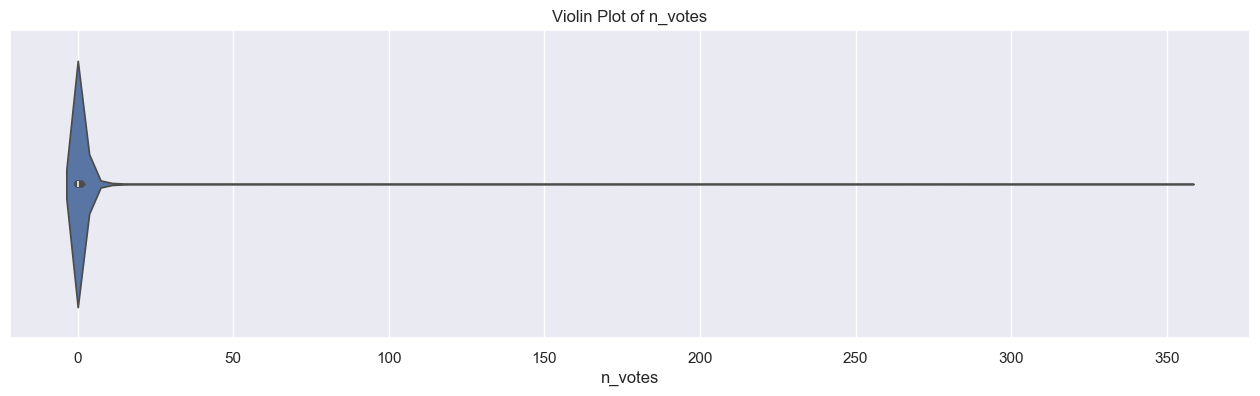

In [21]:
sns.set(rc = {'figure.figsize':(16,4)})
sns.violinplot(x= df.n_votes).set(title= 'Violin Plot of n_votes')

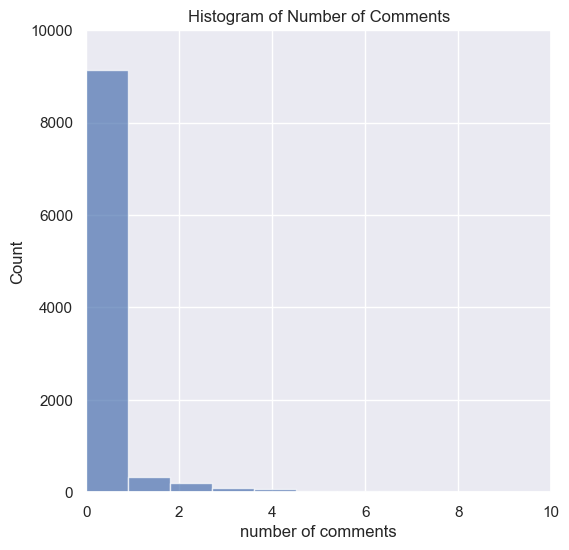

In [22]:
plt.figure(figsize=(6,6))
plt.hist(df['n_comments'], bins=50, alpha=0.7)
plt.xlabel('number of comments')
plt.ylabel('Count')
plt.title('Histogram of Number of Comments')
plt.axis([0,10, 0, 10000])
plt.grid(True)

In [23]:
df.n_comments.value_counts()

n_comments
0     9142
1      327
2      207
3       96
4       76
5       34
6       30
7       18
8       15
10      10
11      10
9        8
17       4
14       3
19       3
21       2
16       2
18       2
29       1
12       1
15       1
22       1
27       1
30       1
26       1
40       1
45       1
24       1
20       1
Name: count, dtype: int64

<font size = 4>*Similar to n_votes, let's check the violin plot*

[Text(0.5, 1.0, 'Violin Plot of n_comments')]

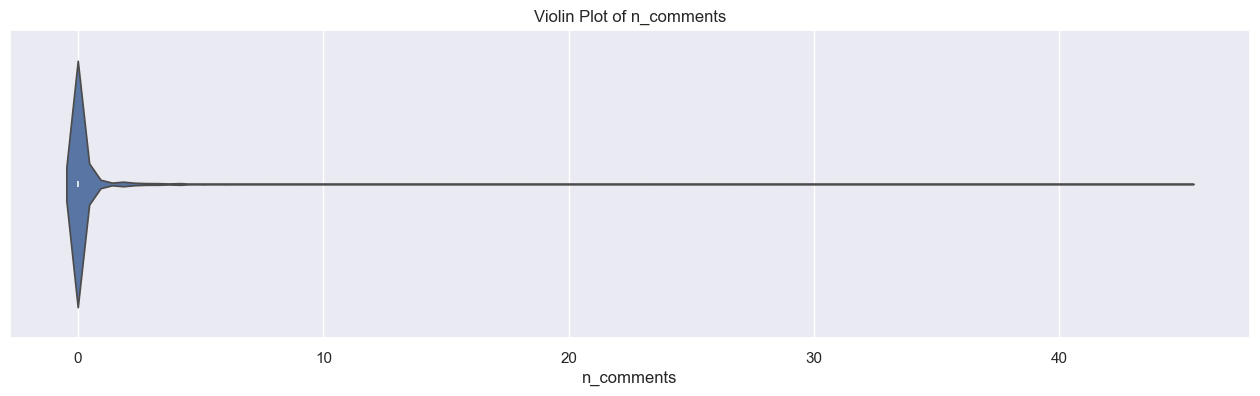

In [24]:
sns.set(rc = {'figure.figsize':(16,4)})
sns.violinplot(x= df.n_comments).set(title= 'Violin Plot of n_comments')

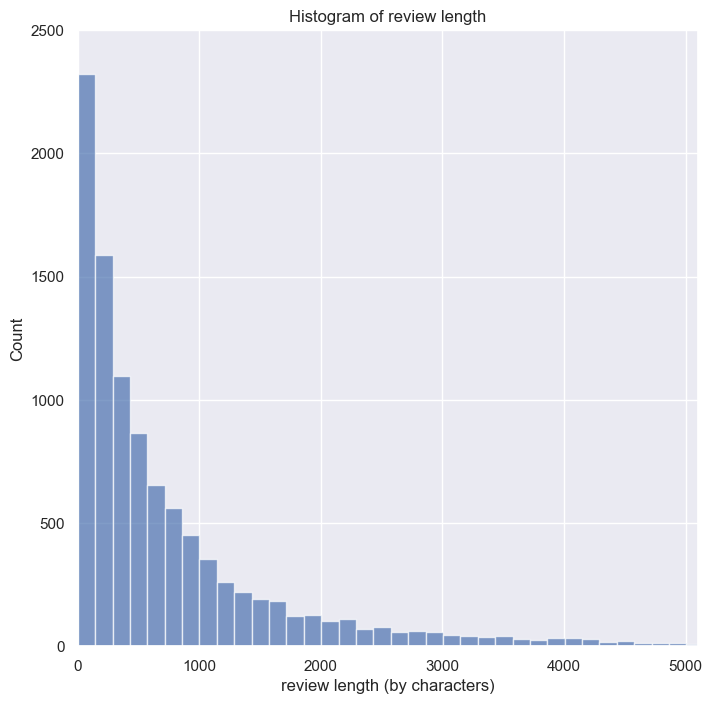

In [25]:
plt.figure(figsize=(8,8))
plt.hist(df['rev_length'], bins=100, alpha=0.7)
plt.xlabel('review length (by characters)')
plt.ylabel('Count')
plt.title('Histogram of review length')
plt.axis([0,5100, 0, 2500])
plt.grid(True)

<font size = 4>*Get counts for each rate and plot the rating frequncy*

In [26]:
ct = pd.DataFrame(df.rating.value_counts())

In [27]:
ct.reset_index(inplace=True)
ct.columns = ['Rating','Counts']

In [28]:
ct

,Rating,Counts
0,4,3265
1,5,3232
2,3,2113
3,2,778
4,0,326
5,1,286


[Text(0.5, 1.0, 'Counts of rating values')]

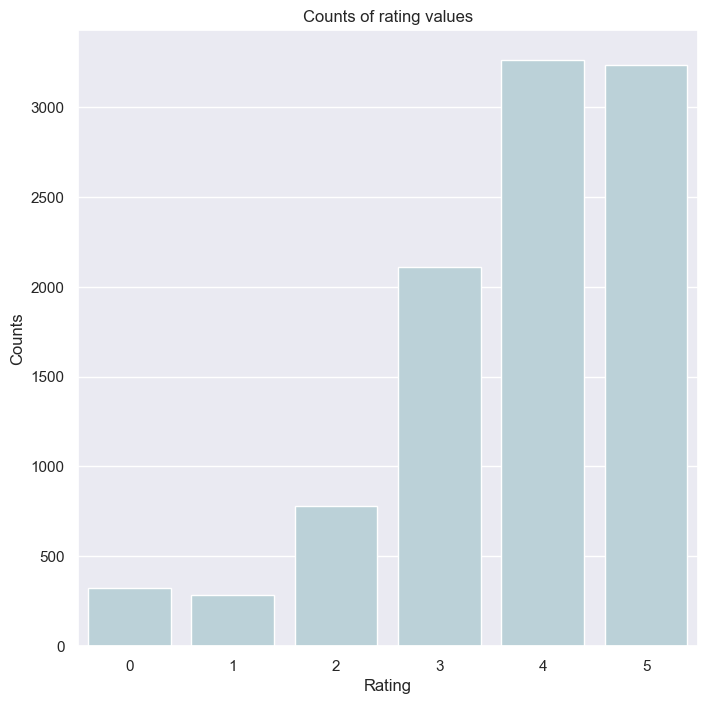

In [29]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.barplot(x = "Rating", y = "Counts", data = ct, color = "lightblue",
            saturation=.5).set(title='Counts of rating values')

### d. rating frequncy 

Display the distribution of user rating frequncy and book rating frequency.

In [30]:
ur = pd.DataFrame(df.user_id.value_counts())
ur.reset_index(inplace=True)
ur.columns = ['user','Counts']

[Text(0.5, 0, 'Users'), Text(0.5, 1.0, 'User rating frequency')]

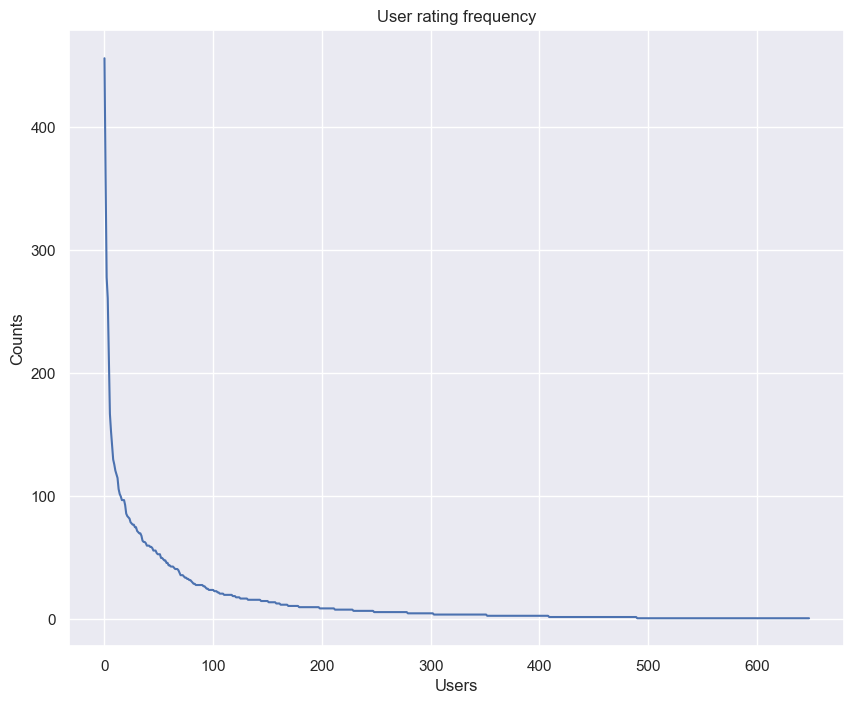

In [31]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.lineplot(x=ur.index, y=ur.Counts).set(xlabel='Users',title='User rating frequency')

[Text(0.5, 0, 'Books'), Text(0.5, 1.0, 'Book rating frequency')]

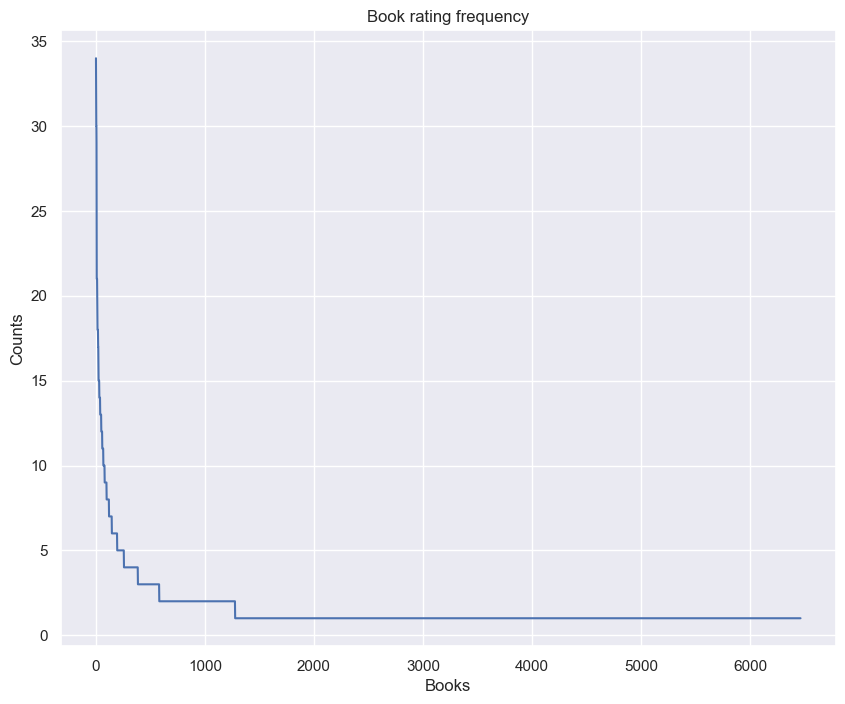

In [32]:
bk = pd.DataFrame(df.book_id.value_counts())
bk.reset_index(inplace=True)
bk.columns = ['book','Counts']
sns.lineplot(x=bk.index, y=bk.Counts).set(xlabel='Books', title="Book rating frequency")

<font size = 4>*Here's the Pearson correlation coefficients of 4 numeric varibles*

In [33]:
cor = df[['rating','n_votes','n_comments','rev_length']].corr()
cor

,rating,n_votes,n_comments,rev_length
rating,1.00e+00,9.66e-03,-0.03,0.06
n_votes,9.66e-03,1.00e+00,0.33,0.02
n_comments,-3.03e-02,3.35e-01,1.00,0.15
rev_length,5.63e-02,2.43e-02,0.15,1.00



## Part 2. Regression-Based Prediction Models
## <a name='regression'></a> 📊 Regression-Based Prediction Models

Implemented regression-based models to predict user ratings based on auxiliary numeric features of the items, providing a feature-driven alternative to collaborative filtering methods.

The workflow included two main stages:
- **Simple Linear Regression**:
  - Built a linear regression model using "n_votes", "n_comments", and "rev_length" as independent variables to predict the "rating" target variable.
  - Performed an 80%-20% train-test split with a fixed random seed to ensure reproducibility.
  - Trained the model on the training data and evaluated its predictive performance using **Root Mean Squared Error (RMSE)** on the test set.

- **Ridge Regression with Hyperparameter Tuning**:
  - Introduced **L2 regularization** to mitigate potential overfitting and improve generalization.
  - Conducted 5-fold cross-validation across a predefined set of alpha values \([0.0, 0.01, 0.1, 0.5, ..., 3000.0]\).
  - Plotted the relationship between alpha values and mean cross-validation RMSE to identify the optimal regularization strength.
  - Retrained the Ridge model using the best-performing alpha and assessed its final RMSE on the test set.

The results from Ridge regression were compared against the baseline linear regression to evaluate the impact of regularization on model performance.

### 2a. Regression Model

Construct and evaluate a basic regression models to predict the "rating" value (the target variable) based on the other 3 numeric values ("n_votes", "n_comments", and "rev_length"). Fit model to the 80% training data and compute the RMSE score on the 20% test data.

In [34]:
X = df[['n_votes','n_comments','rev_length']]
y = df[['rating']]

In [35]:
y

,rating
0,5
1,5
2,5
3,4
4,3
...,...
9995,4
9996,4
9997,0
9998,2


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

### Simple linear regression

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Create linear regression object
reg = LinearRegression()

# Train the model using the training set
reg.fit(X_train, y_train)
pred = reg.predict(X_train)
pred[0:10]

array([[3.78786677],
       [3.83797923],
       [3.69906877],
       [3.78109999],
       [3.71030417],
       [3.61120034],
       [3.70749532],
       [3.70423961],
       [3.70226064],
       [3.71190011]])

In [41]:
sum_mean=0
for i in range(len(pred)):
    sum_mean+=(pred[i]-y_train.values[i])**2

RMSE=np.sqrt(sum_mean/len(pred))[0]

print("RMSE on Training Data: ", RMSE.round(4))

RMSE on Training Data:  1.2425


In [102]:
pred_test = reg.predict(X_test)
sum_mean=0
for i in range(len(pred_test)):
    sum_mean+=(pred_test[i]-y_test.values[i])**2

RMSE_L=np.sqrt(sum_mean/len(pred_test))[0]

print("RMSE on Testing Data: ", RMSE_L.round(4))

RMSE on Testing Data:  1.2533


<font size =4>*RMSE on testing data reported above*  


### 2b. Rideg regression 
#### Find RMSE on different alphas in Rideg regression 

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

alpha = [0.0, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 300.0, 500.0, 700.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0]

rmse = np.array([])
for a in alpha:
    ridge_regression = Ridge(alpha=a)
    
    scores = cross_val_score(ridge_regression, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores = np.sqrt(abs(scores))
    
    rmse = np.append(rmse, [scores.mean()])
    print('{:10.3f}\t{:.4f}'.format(a,scores.mean()))

     0.000	1.2428
     0.010	1.2428
     0.100	1.2428
     0.500	1.2428
     1.000	1.2428
     5.000	1.2428
    10.000	1.2428
    50.000	1.2428
   100.000	1.2428
   300.000	1.2427
   500.000	1.2427
   700.000	1.2427
  1000.000	1.2427
  1500.000	1.2427
  2000.000	1.2427
  2500.000	1.2428
  3000.000	1.2428


[Text(0.5, 0, 'Regularization Coefficient'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'Ridge Regression X-Validation')]

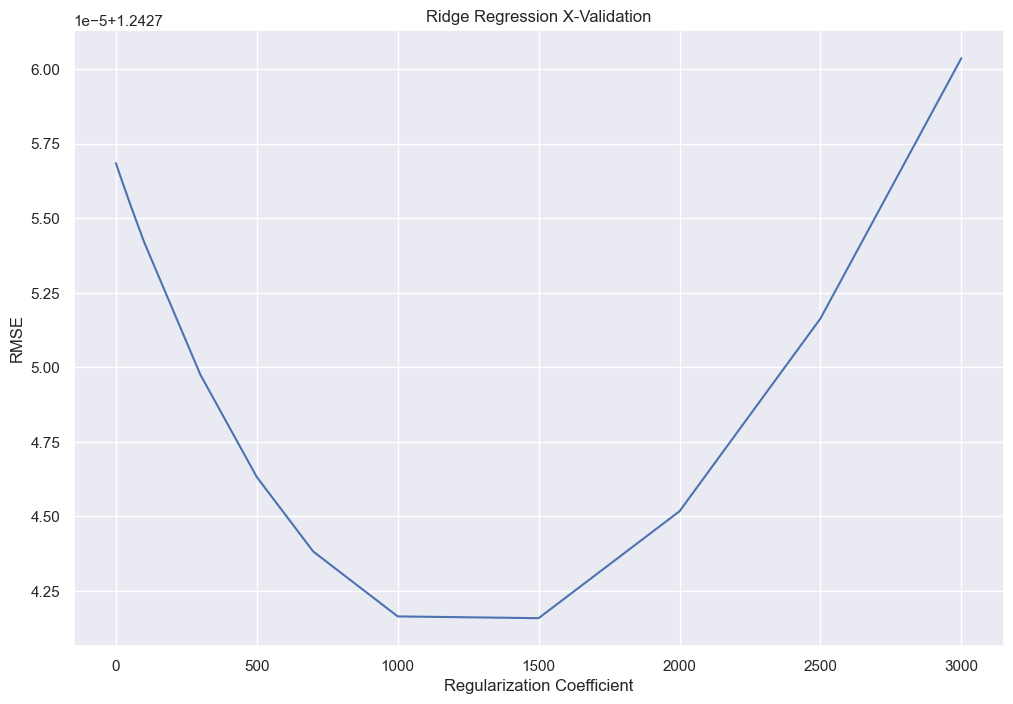

In [45]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.lineplot(x=alpha, y=rmse).set(xlabel="Regularization Coefficient", 
                                  ylabel="RMSE",title='Ridge Regression X-Validation')

In [46]:
a_min = alpha[rmse.tolist().index(rmse.min())]
print ("The best alpha value is {}".format(a_min))

The best alpha value is 1500.0


In [103]:
ridge = Ridge(alpha=1500)
ridge.fit(X_train, y_train)
pred_test_R = ridge.predict(X_test)
sum_mean=0
for i in range(len(pred_test_R)):
    sum_mean+=(pred_test_R[i]-y_test.values[i])**2
RMSE_R=np.sqrt(sum_mean/len(pred_test_R))[0]

print("RMSE on Testing Data: ", RMSE_R.round(4))

RMSE on Testing Data:  1.2533


<font size =4>*The best alpha is 1500 and apply it to ridge regression. Here we can have RMSE on testing data*

In [33]:
print('RMSE of Simple regression:{}\nRMSE of Ridge regression:{}'.format(RMSE, RMSE_R))

RMSE of Simple regression:0.6266723062132303
RMSE of Ridge regression:0.6266364293245104


## Part 3. Simple Popularity Based Prediction Model

## <a name='popularity'></a> 📈 Popularity-Based Rating Prediction

Implemented a non-personalized baseline model where, for each user-book pair \((u, b)\), the predicted rating is set to the **average rating** of book \(b\) computed from the training data.

The model consists of two components:
- **Training Component**: Aggregates and stores the average rating for each book based on historical user interactions.
- **Prediction Component**: For each (user, book) pair in the test set, retrieves the precomputed average rating as the prediction.

The model's performance is evaluated using **Root Mean Squared Error (RMSE)** on the test data, providing a benchmark for comparison against feature-based regression models.

In [73]:
  '''This is a non-personalized model. The model predicts the user u's rating on book b by computing the average 
    rating on book b across all users in the training data '''
    
    def train (self,train):
        'takes the training data and returns a data structure containing average ratings for each book'
        self.train = train 
        # extract book id and ratings and put in to a dictionary
        self.convert = {}
        for row in self.train.itertuples():
            b_id = getattr(row,'book_id')
            rate = getattr(row,'rating')
            if b_id in self.convert.keys():
                self.convert[b_id].append(rate)
            else:
                self.convert[b_id]= [rate]
        self.r = {}
        for key in self.convert.keys():
            self.r[str(key)] = np.mean(self.convert[key])
        return self.r
    
    
    def predict (self,test,r):
        '''This function takes the test data and the data structure containing the average ratings, '''
        ''' and return a list or array of predicted ratings.'''
        
        self.test = test
        self.pred = []
        # for each entry in the test dataset, pull book id out and find the corresponding rating value 
        for row in self.test.itertuples():
            b_id = str(getattr(row,'book_id'))
            # self.pred.append(self.r[b_id])
            if b_id in self.r.keys():
                self.pred.append(self.r[b_id])
            else:
                self.pred.append('Null') 
                
        return self.pred
    
    def rmse(self):
        '''This function help to calculate RMSE on testing data'''
        org = self.test['rating'].tolist()
        sum_mean=0
        count = 0
        for i in range(len(self.pred)):
            if self.pred[i] != 'Null':
                sum_mean += (self.pred[i] - org[i])**2
                count += 1
            else:
                sum_mean += (np.mean(org) - org[i])**2
                count += 1
                print("Training data for user_{} is missing, using user's mean rating to predict.".format(i))
        self.rmse_test = np.sqrt(sum_mean/count)
        return self.rmse_test

In [74]:
train,test = train_test_split(df, test_size=0.2, random_state=66)
m = NonPersonalizedModel()
rate = m.train(train)
rate

{'31622576': 4.0,
 '17162437': 5.0,
 '18046743': 1.0,
 '17934886': 5.0,
 '17061': 3.5,
 '27272506': 3.0,
 '7327916': 3.0,
 '10836728': 3.25,
 '17465483': 5.0,
 '28187': 3.5,
 '14740590': 3.0,
 '27405702': 2.0,
 '23197122': 4.0,
 '23660326': 3.0,
 '13411245': 2.0,
 '10637766': 4.0,
 '199786': 4.5,
 '6294': 3.4,
 '72193': 4.5,
 '49041': 3.0,
 '1062774': 3.0,
 '15754113': 5.0,
 '30408280': 4.0,
 '17429833': 4.0,
 '9858714': 4.5,
 '5983694': 4.666666666666667,
 '28094400': 3.0,
 '8908': 4.25,
 '395871': 3.0,
 '8621462': 4.6,
 '18053143': 4.0,
 '207684': 3.0,
 '25187640': 4.0,
 '16268911': 5.0,
 '6580510': 3.0,
 '244475': 3.0,
 '12558285': 4.0,
 '40290': 0.0,
 '13302279': 3.0,
 '1656001': 3.3529411764705883,
 '1048623': 0.0,
 '6304335': 3.4285714285714284,
 '1': 4.4,
 '24469717': 3.0,
 '11801463': 3.0,
 '42899': 3.6470588235294117,
 '4502877': 4.428571428571429,
 '831186': 4.0,
 '25243409': 5.0,
 '7896527': 3.6153846153846154,
 '13603792': 5.0,
 '6382661': 3.0,
 '31226229': 3.0,
 '8966': 0.

<font size = 4>*As we can see, train function returns a dictionary of book and it's average rating. The predict function below could give us the prediction for each book and user pair.*

In [75]:
m.predict(test,rate)

[4.333333333333333,
 4.375,
 4.333333333333333,
 'Null',
 5.0,
 'Null',
 'Null',
 3.0,
 'Null',
 5.0,
 3.0,
 3.6470588235294117,
 3.8,
 'Null',
 'Null',
 'Null',
 4.0,
 'Null',
 'Null',
 3.5,
 3.875,
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 4.7272727272727275,
 'Null',
 3.3529411764705883,
 'Null',
 'Null',
 3.5,
 'Null',
 4.4,
 4.555555555555555,
 4.0,
 5.0,
 'Null',
 'Null',
 5.0,
 3.0,
 'Null',
 'Null',
 'Null',
 4.142857142857143,
 'Null',
 4.0,
 'Null',
 3.0,
 'Null',
 'Null',
 'Null',
 4.153846153846154,
 'Null',
 0.0,
 'Null',
 'Null',
 4.0,
 'Null',
 'Null',
 4.0,
 'Null',
 5.0,
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 3.5833333333333335,
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 'Null',
 3.0,
 'Null',
 'Null',
 3.0,
 'Null',
 0.0,
 'Null',
 'Null',
 4.25,
 'Null',
 'Null',
 3.4210526315789473,
 4.5,
 4.0,
 'Null',
 4.0,
 5.0,
 'Null',
 3.0,
 'Null',
 3.909090909090909,
 'Null',
 'Null',
 'Null',
 'Null',
 5.0,

In [97]:
Popularity_RMSE = m.rmse()
print("RMSE on Testing Data: ", Popularity_RMSE.round(4))

Training data for user_3 is missing, using user's mean rating to predict.
Training data for user_5 is missing, using user's mean rating to predict.
Training data for user_6 is missing, using user's mean rating to predict.
Training data for user_8 is missing, using user's mean rating to predict.
Training data for user_13 is missing, using user's mean rating to predict.
Training data for user_14 is missing, using user's mean rating to predict.
Training data for user_15 is missing, using user's mean rating to predict.
Training data for user_17 is missing, using user's mean rating to predict.
Training data for user_18 is missing, using user's mean rating to predict.
Training data for user_21 is missing, using user's mean rating to predict.
Training data for user_22 is missing, using user's mean rating to predict.
Training data for user_23 is missing, using user's mean rating to predict.
Training data for user_24 is missing, using user's mean rating to predict.
Training data for user_25 is 

<font size = 4>*RMSE on testing data is about 1.3351, a little bigger than regression model we had above. This is expected since the average method only relies on ratings given by other users.*


## <a name='summary'></a> 📝 Summary

In this chapter, we explored the foundational building blocks of recommender systems by implementing several models entirely from scratch:
- Basic data exploration and preprocessing to prepare a clean training pipeline.
- Regression-based predictors leveraging auxiliary item features.
- Simple non-personalized recommendation baselines using global statistics.
- Collaborative filtering techniques based on user-user similarities.

Importantly, no external recommender libraries were used in this chapter. The focus remained on manually building, tuning, and evaluating models to deepen algorithmic understanding and practical implementation skills.

These foundational approaches set the stage for more advanced recommendation techniques in subsequent chapters.


## THE END